1.2.1 Задание:
Выполните по вариантам соответственно реализацию генетического
алгоритма в соответствии с приложенными начальными данными.
![alt text](image.png)

In [8]:
#функция Z
def qZ(x,y):
    return (x-3*y+1)/(3*x**2+y**2+1)
#Сумма функций роста хромоссом
def qsumZ(Z):
    return (sum(Z))
#Распределение хромоссом
def exchangeScheme(oX,oY,sortedid):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]
    X[0] = oX[sortedid[0]]
    X[1] = oX[sortedid[1]]
    X[2] = oX[sortedid[2]]
    X[3] = oX[sortedid[2]]
    Y[0] = oY[sortedid[2]]
    Y[1] = oY[sortedid[2]]
    Y[2] = oY[sortedid[0]]
    Y[3] = oY[sortedid[1]]
    return X, Y
#сортировка хромоссом
def sorting(Z):
    sortedid=sorted(range(len(Z)),key=lambda k:Z[k])
    return sortedid
#естестественный отбор
def evostep(X,Y,Z):
    _, minID=min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    X.pop(minID)
    Y.pop(minID)
    Z.pop(minID)
    return X,Y,Z
#шаги эволюции
def evosteps(X, Y, evosteps = 5):
    results=[]
    for i in range(evosteps):
        arrZ=[qZ(x, Y[i]) for i, x in enumerate(X)]
        X,Y,Z=evostep(X,Y,arrZ)
        X,Y = exchangeScheme(X,Y,sorting(Z))
        results.append([X,Y,qsumZ(arrZ),arrZ])
    return X, Y, results
#хромоссомы 
X=[-2,-1,0,2]
Y=[-2,0,-1,1]
results = evosteps(X,Y)
#вывод
for i in range(len(results[2])):
    print(f'max_{i+1}_step:{results[2][i][2]}')
qualityarrZ=[]
for i in range(len(results[2])):
    qualityarrZ += results[2][i][3]
print(f'max Z: {max(qualityarrZ)}')



max_1_step:2.2941176470588234
max_2_step:0.9714285714285713
max_3_step:4.823529411764706
max_4_step:5.828571428571428
max_5_step:7.4
max Z: 2.0


1.3.1 Задание
Найти длину гамильтонова цикла S4 в полном графе K6 после четырех
циклов решения задачи методом отжига по вариантам ниже.
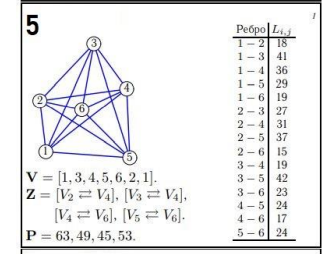

Лучший выбранный маршрут: [1, 5, 3, 4, 6, 2, 1]
Длина лучшего выбранного маршрута: 140
Длины всех рассмотренных маршрутов: [141, 128, 140, 166, 155]


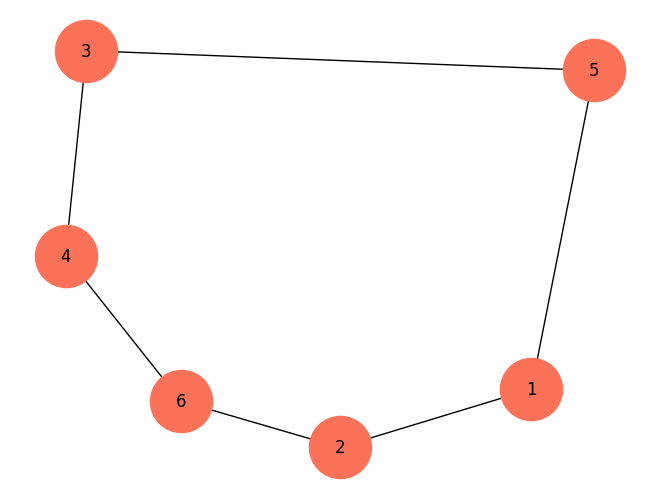

In [19]:
import networkx as nx
from math import e

distances = [(1, 2, 18),
             (1, 3, 41),
             (1, 4, 36),
             (1, 5, 29),
             (1, 6, 19),
             (2, 3, 27),
             (2, 4, 31),
             (2, 5, 37),
             (2, 6, 15),
             (3, 4, 19),
             (3, 5, 42),
             (3, 6, 23),
             (4, 5, 24),
             (4, 6, 17),
             (5, 6, 24)]

V = [1, 3, 4, 5, 6, 2, 1]
Z = [(2, 4),
     (3, 4),
     (4, 6),
     (5, 6)]
P = [63, 49, 45, 53]

T=100

def probability(delta, T):
    return 100 * e ** (-delta / T)


def reductTemp(prevT):
    nextT = 0.5 * prevT

    return nextT


# graph = nx.Graph()
# graph.add_weighted_edges_from(distances)
# nx.draw_kamada_kawai(graph,node_color='#fb7258',node_size=2000,with_labels=True)

def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])


def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

    return sum(edges)


def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV


def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V


def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength

        if deltaS > 0:
            p = probability(deltaS, T)

            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        T = reductTemp(T)

    return V, arrSum


def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)

    graph = nx.Graph()

    graph.add_weighted_edges_from(newDistances)

    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)


bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)

    
    

1.3.2 Задание*:
На решенном уже примере поэкспериментируйте с показателем S,
проанализируйте результаты.

Лучший выбранный маршрут: [1, 5, 4, 3, 6, 2, 1]
Длина лучшего выбранного маршрута: 128
Длины всех рассмотренных маршрутов: [141, 128, 140, 163, 133]


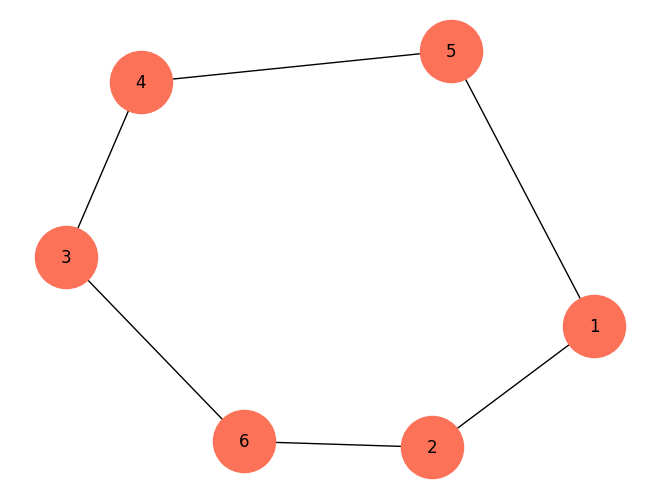

In [6]:
import networkx as nx
from math import e

distances = [(1, 2, 18),
             (1, 3, 41),
             (1, 4, 36),
             (1, 5, 29),
             (1, 6, 19),
             (2, 3, 27),
             (2, 4, 31),
             (2, 5, 37),
             (2, 6, 15),
             (3, 4, 19),
             (3, 5, 42),
             (3, 6, 23),
             (4, 5, 24),
             (4, 6, 17),
             (5, 6, 24)]

V = [1, 3, 4, 5, 6, 2, 1]
Z = [(2, 4),
     (3, 4),
     (4, 6),
     (5, 6)]
P = [99, 99, 98, 97,32,12,31, 20, 10, 8 ,9 ,2]

T=100

def probability(delta, T):
    return 100 * e ** (-delta / T)


def reductTemp(prevT):
    nextT = 0.5 * prevT

    return nextT


def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])


def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

    return sum(edges)


def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV


def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V


def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength

        if deltaS > 0:
            p = probability(deltaS, T)

            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        T = reductTemp(T)

    return V, arrSum


def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)

    graph = nx.Graph()

    graph.add_weighted_edges_from(newDistances)

    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)


bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)

    
    